In [12]:
#libraries that will be used
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**Main data**

In [13]:
#reading the file and converting to dataframe
file_path = 'internet_usage_frequency.xls'
df = pd.read_excel(file_path)     

#row filtering
df = df.iloc[4:6]        

#dropping unnecessary columns
df.drop(['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 9', 'Unnamed: 16'], axis=1, inplace=True)

#renaming columns 
df.iloc[0, 0] = "Years"     #changing the name of the first column
df.rename(columns={
    'Unnamed: 3': '6-15 ages Total',
    'Unnamed: 4': '6-15 ages Total',
    'Unnamed: 5': '6-15 ages Male',
    'Unnamed: 6': '6-15 ages Male',
    'Unnamed: 7': '6-15 ages Female',
    'Unnamed: 8': '6-15 ages Female',
    'Unnamed: 10': '6-10 ages Total',
    'Unnamed: 11': '6-10 ages Total',
    'Unnamed: 12': '6-10 ages Male',
    'Unnamed: 13': '6-10 ages Male',
    'Unnamed: 14': '6-10 ages Female',
    'Unnamed: 15': '6-10 ages Female',
    'Unnamed: 17': '11-15 ages Total',
    'Unnamed: 18': '11-15 ages Total',
    'Unnamed: 19': '11-15 ages Male',
    'Unnamed: 20': '11-15 ages Male',
    'Unnamed: 21': '11-15 ages Female',
    'Unnamed: 22': '11-15 ages Female'
}, inplace=True)

#transposing the dataframe and setting the first row as column headers
df = df.T
df.columns = df.iloc[0]

#dropping the first row and resetting index
df = df.iloc[1:]
df.reset_index(inplace=True)

#renaming columns appropriately and converting the 'Year' column to integers
df.columns = ['Age', 'Year', 'Percentage']
df['Year'] = df['Year'].astype(int)

#pivotting the DataFrame to rearrange data structure
df = df.pivot(index='Year', columns='Age', values='Percentage').reset_index()

#reordering the columns and reset the DataFrame index
df = df.reset_index(drop=True).iloc[:, ::-1]
columns = [df.columns[-1]] + list(df.columns[:-1])
df = df[columns]

#clearing the name of columns for better presentation and storing the modified DataFrame in df_usage variable
df.columns.name = None
df_usage = df
df_usage


,Year,6-15 ages Total,6-15 ages Male,6-15 ages Female,6-10 ages Total,6-10 ages Male,6-10 ages Female,11-15 ages Total,11-15 ages Male,11-15 ages Female
0,2013,50.809139,53.676988,47.823246,36.885432,38.333709,35.430989,65.085509,68.855459,61.012316
1,2021,82.739884,83.89606,81.520918,78.141727,79.46743,76.7439,87.394716,88.379678,86.35636


*The dataframe above shows Internet usage rates from different age groups and genders in 2013 and 2021 in Turkey.*

In [14]:
#creating a new DataFrame 'df_filter_usage' containing specific columns from 'df_usage' for comparing with the dataframe 'df_disease'
#selecting columns 'Year' and '6-15 ages Total' from the DataFrame 'df_usage' for comparing with the dataframe 'df_disease'
df_filter_usage = df_usage[['Year', '6-15 ages Total']]

#displaying the resulting DataFrame 
df_filter_usage

,Year,6-15 ages Total
0,2013,50.809139
1,2021,82.739884


*The dataframe above shows Internet usage rates from 6-15 age group of both genders in 2013 and 2021 in Turkey. This dataframe is obtained from the first dataframe for comparing the rates of different diseases and Internet usage.*

**Question 1**

**Is there a relationship between the rate of internet usage and obesity rates in children?**

**DataFrame of Obesity Rates from 5-9 age group of both sexes between 2010 and 2016 in Turkey**

In [15]:
#reading the file and converting to dataframe
file_path = 'obesity_data.csv'
df = pd.read_csv(file_path)

#filtering data based on specific conditions and applying these conditions to filter the DataFrame
condition_1 = df['SpatialDimValueCode'] == 'TUR'
condition_2 = df['Period'].isin([2010, 2011, 2012, 2013, 2014, 2015, 2016])
df = df[['SpatialDimValueCode', 'Location', 'Period', 'FactValueNumeric', 'FactValueNumericLow', 'FactValueNumericHigh', 'Dim1', 'Dim2']]
df = df[df['Dim2'] == '5-9 years']
df.rename(columns={'Dim1': 'Sex'}, inplace=True)
df.rename(columns={'Dim2': 'Age Group'}, inplace=True)

#filtering data based on sex and previous conditions and storing the resulting DataFrame in df_obesity variable
condition_3 = df['Sex'] == 'Both sexes'
df = df[condition_1 & condition_2 & condition_3]
df_obesity = df
df_obesity


<ipython-input-15-497c1d73b878>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[condition_1 & condition_2 & condition_3]


,SpatialDimValueCode,Location,Period,FactValueNumeric,FactValueNumericLow,FactValueNumericHigh,Sex,Age Group
573,TUR,Türkiye,2016,14.9,7.3,24.5,Both sexes,5-9 years
2318,TUR,Türkiye,2015,14.4,7.2,23.6,Both sexes,5-9 years
4036,TUR,Türkiye,2014,13.9,7.0,22.7,Both sexes,5-9 years
5791,TUR,Türkiye,2013,13.4,6.8,22.1,Both sexes,5-9 years
7535,TUR,Türkiye,2012,12.9,6.6,21.4,Both sexes,5-9 years
9266,TUR,Türkiye,2011,12.4,6.4,20.7,Both sexes,5-9 years
11025,TUR,Türkiye,2010,11.9,6.1,20.0,Both sexes,5-9 years


**Graph Showing the Correlation of Obesity and Internet Usage**

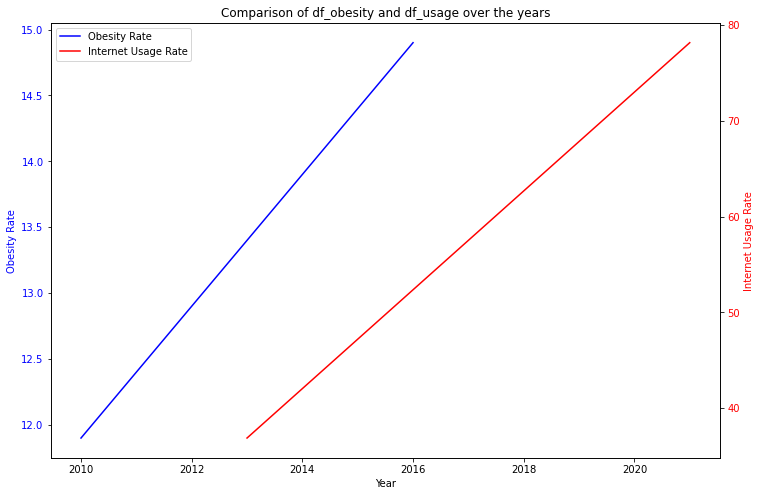

In [16]:
#assuming df_obesity and df_usage contain columns 'Year' and 'FactValueNumeric' for obesity data
#and 'Year' and '6-10 ages Total' for internet usage data respectively

#creating a figure and axis (ax1) for the plot, specifying figure size
fig, ax1 = plt.subplots(figsize=(12, 8))

#plotting obesity data on the first y-axis (ax1)
ax1.plot(df_obesity['Period'], df_obesity['FactValueNumeric'], label='Obesity Rate', color='b')

#setting label for x-axis and y-axis on the left, and setting color for y-axis ticks 
ax1.set_xlabel('Year')
ax1.set_ylabel('Obesity Rate', color='b')
ax1.tick_params(axis='y', labelcolor='b')

#creating a second y-axis (ax2) sharing the same x-axis as ax1
ax2 = ax1.twinx()

#plotting internet usage data on the second y-axis (ax2)
ax2.plot(df_usage['Year'], df_usage['6-10 ages Total'], label='Internet Usage Rate', color='r')
#setting label for y-axis on the right and setting color for y-axis ticks on the right
ax2.set_ylabel('Internet Usage Rate', color='r')
ax2.tick_params(axis='y', labelcolor='r')

#adding legends for both lines on the plot and getting them for both ax1 and ax2
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()

#combining lines and labels from both axes and displaying them
lines = lines_1 + lines_2
labels = labels_1 + labels_2
plt.legend(lines, labels, loc='best')

#adding a title to the plot and displaying it
plt.title('Comparison of df_obesity and df_usage over the years')
plt.show()

*The percentage of the internet usage in age group 6-10 in 2021 is higher than that in 2013. Meanwhile, the obesity rate in age group 5-9 in 2016 is also higher than that in 2010. When the graph is interpreted, it can seen that both lines show increasing trend between 2013 and 2016. In this case, there is possibility that increased obesity rate is related to increased internet usage.*

**Question 2**

**Does the increase in internet usage by children also lead them to become addicted to mobile devices?**

**DataFrame of different behaviors from different age groups and genders in 2021**

In [17]:
#reading the file and converting to dataframe
file_path = 'behaviors.xls'
df = pd.read_excel(file_path)

#row and column filtering
df = df.iloc[4:11]      
df = df.iloc[:, 1:]   

#dropping unnecessary columns 
df.drop(['Unnamed: 5', 'Unnamed: 9'], axis=1, inplace=True)     

#renaming columns
df.rename(columns={
    'Unnamed: 1': 'Behaviors',
    'Unnamed: 2': '6-15 ages Total',
    'Unnamed: 3': '6-15 ages Male',
    'Unnamed: 4': '6-15 ages Female',
    'Unnamed: 6': '6-10 ages Total',
    'Unnamed: 7': '6-10 ages Male',
    'Unnamed: 8': '6-10 ages Female',
    'Unnamed: 10': '11-15 ages Total',
    'Unnamed: 11': '11-15 ages Male',
    'Unnamed: 12': '11-15 ages Female',

}, inplace=True)

#store the modified DataFrame in the variable 'df_addiction' and displaying it
df_addiction = df
df_addiction



,Behaviors,6-15 ages Total,6-15 ages Male,6-15 ages Female,6-10 ages Total,6-10 ages Male,6-10 ages Female,11-15 ages Total,11-15 ages Male,11-15 ages Female
4,En az 30 dakikada bir telefonunu kontrol etme\...,32.283339,32.787716,31.724294,16.528708,16.74273,16.28888,43.512481,44.325757,42.618053
5,Uyumadan önce yaptığı son şey telefonunu kontr...,29.432737,30.466546,28.286876,11.739847,11.783702,11.690704,42.043377,43.901486,39.999857
6,Uyandıktan sonra yaptığı ilk şey telefonunu ko...,26.915231,27.508105,26.258097,13.599319,15.658483,11.291873,36.406171,36.029236,36.820719
7,Televizyon izlerken cep telefonu/akıllı telefo...,23.728389,24.790383,22.551289,14.507905,16.916038,11.809412,30.300307,30.45287,30.13252
8,Başkalarıyla yemek yerken cep telefonu/akıllı ...,13.33809,14.834736,11.679227,13.422504,14.850149,11.82272,13.277923,14.823652,11.577955
9,En az birini yapan çocukların oranı\nProportio...,52.359577,54.586277,49.891532,35.304667,37.743687,32.571563,64.515495,66.69788,62.115343
10,Hepsini yapan çocukların oranı\nProportion of ...,3.658187,3.977776,3.303958,1.524371,1.460503,1.595939,5.179068,5.787961,4.509416


*The behaviors mentioned in the DataFrame above can be accepted as addictions.*

**The Graph Showing the Correlation of Addiction Behaviors and Internet Usage**

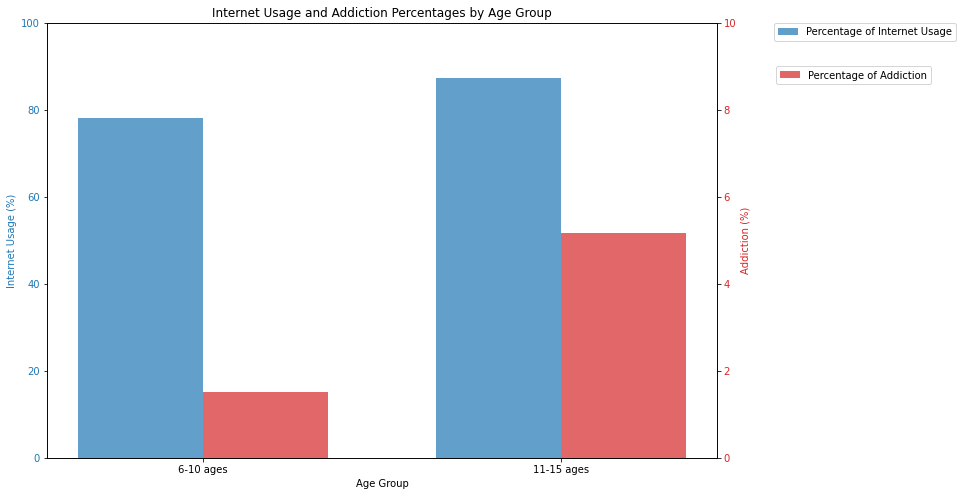

In [18]:
#filtered Internet Usage of Children in 2021 regardless their gender
df_internet_filtered = df_usage[[ '6-10 ages Total', '11-15 ages Total']]
df_internet_filtered = df_internet_filtered.iloc[-1:]

#filtered Addiction Dataframe to find children who shows all the signs of addiction according to ages regardless their gender
df_ad_filtered = df_addiction[['6-10 ages Total', '11-15 ages Total']]
df_ad_filtered =df_ad_filtered.iloc[-1:]

# Plot a graph that compares the increases of internet usage and addiction of children according to age groups, and setting the width of the bars
fig, ax1 = plt.subplots(figsize=(12, 8))
bar_width = 0.35

#create bar positions for internet usage and addiction
bar_positions_internet = np.arange(len(df_internet_filtered.columns))
bar_positions_addiction = bar_positions_internet + bar_width

#plotting Internet usage on the right y-axis
color = 'tab:blue'
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Internet Usage (%)', color=color)
ax1.bar(bar_positions_internet, df_internet_filtered.iloc[0], width=bar_width, color=color, label='Percentage of Internet Usage', alpha=0.7)
ax1.tick_params(axis='y', labelcolor=color)

#creating a second y-axis for addiction percentages on the left
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Addiction (%)', color=color)
ax2.bar(bar_positions_addiction, df_ad_filtered.iloc[0], width=bar_width, color=color, label='Percentage of Addiction', alpha=0.7)
ax2.tick_params(axis='y', labelcolor=color)

#setting x-axis ticks and labels
label_age = ['6-10 ages','11-15 ages']
ax1.set_xticks(bar_positions_internet + bar_width / 2)
ax1.set_xticklabels(label_age)


#moving the legend outside of the graph
ax1.legend(loc='upper left', bbox_to_anchor=(1.085, 1), borderaxespad=0.)
ax2.legend(loc='upper right', bbox_to_anchor=(1.32, 0.9), borderaxespad=0.)

#rearranging the percentages in the y axises
yticks_internet = np.arange(0, 101, 20)  
yticks_addiction = np.arange(0, 11, 2)  
ax1.set_yticks(yticks_internet)
ax2.set_yticks(yticks_addiction)

#adding the title for the plot and displaying it 
plt.title('Internet Usage and Addiction Percentages by Age Group')
plt.show()

*The percentage of the internet usage in age group 11-15 is higher than that in age group 6-10. Meanwhile, the addiction percentage in age group 11-15 is also higher than that in age group 6-10. In this case, there is possibility that addiction is related to increased internet usage.*

**Question 3**

**Have physical and mental diseases increased with the increase in internet usage by children?**

**DataFrame of different diseases from 7-14 age group of both genders in 2016, 2019, 2022**

In [22]:
#reading the file and converting to dataframe
file_path = 'health_problems.xls'
df = pd.read_excel(file_path)

#row filtering and removing
df = df.iloc[9:14]   
df = df.drop([10, 11])    

#removing unnecessary columns
df = df.drop(df.columns[[1,3,4,5,7,8,9,11,12]], axis=1)

#renaming columns
df.rename(columns={
    'Unnamed: 2': 2016,
    'Unnamed: 6': 2019,
    'Unnamed: 10': 2022,
    'Cinsiyete göre 7-14 yaş grubundaki çocukların son 6 ay içinde geçirdiği başlıca hastalık/sağlık sorunlarının dağılımı, 2016-2022': 'Diseases'
}, inplace=True)

#storing the resulting DataFrame in the variable 'df_disease' and displaying it
df_disease = df
df_disease

,Diseases,2016,2019,2022
9,Göz ile ilgili sorunlar\nVisual problems,13.637965,10.949662,8.828622
12,Kas iskelet sistemi hastalıkları\nMusculoskele...,1.799839,1.324695,1.224864
13,Ruh sağlığı sorunları\nMental health problems,1.341183,1.104757,1.090581


**Graph Showing the Correlation of Some Diseases and Internet Usage**

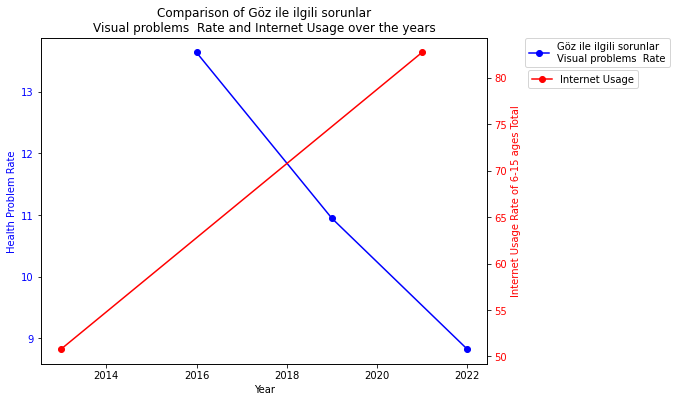

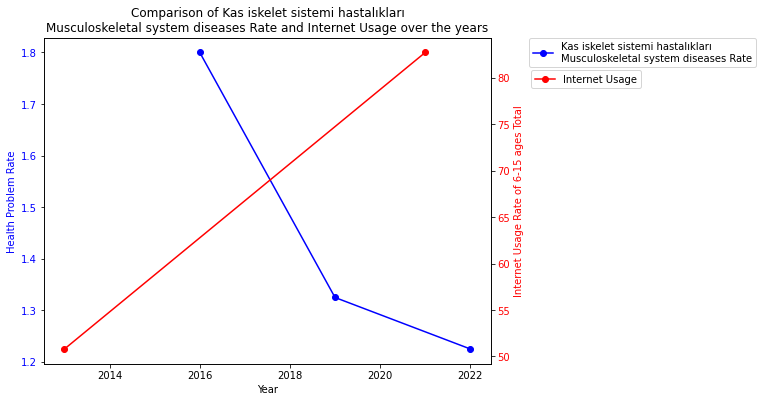

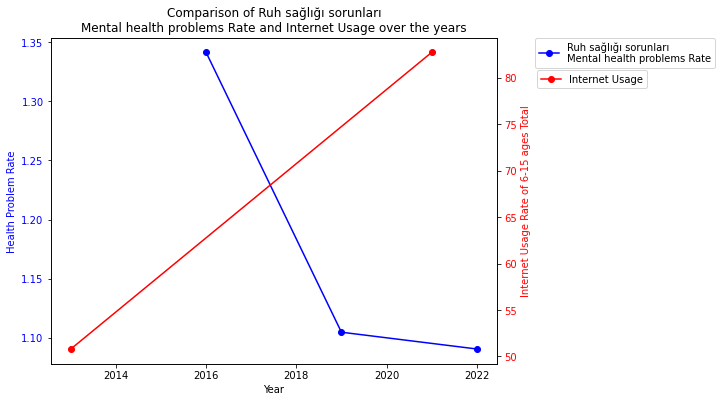

In [23]:
#loop through each disease in the 'Diseases' column of df_disease DataFrame
for disease in df_disease['Diseases']:
    #creating a figure and axis (ax1) for the plot, specifying figure size
    fig, ax1 = plt.subplots(figsize=(8, 6))

    #plotting data from the first dataframe 'df_disease'
    #plotting the disease rate over the years, selecting the rows where 'Diseases' column matches the current disease
    ax1.plot(df_disease.columns[1:], df_disease[df_disease['Diseases'] == disease].iloc[0, 1:], marker='o', label=f'{disease} Rate', color='b')

    #setting x-axis label for the plot, y-axis label for the first y-axis, and y-axis ticks color to blue
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Health Problem Rate', color='b')
    ax1.tick_params(axis='y', labelcolor='b')

    #creating a second y-axis for the second dataframe 'df_filter_usage'
    ax2 = ax1.twinx()       #creating a twinx axis sharing the same x-axis

    #plotting Internet usage rate of '6-15 ages Total' over the years on the second y-axis
    ax2.plot(df_filter_usage['Year'], df_filter_usage['6-15 ages Total'], marker='o', label='Internet Usage', color='r')

    #setting y-axis label for the second y-axis and y-axis ticks color to red
    ax2.set_ylabel('Internet Usage Rate of 6-15 ages Total', color='r')
    ax2.tick_params(axis='y', labelcolor='r')
    
    #moving the legend outside of the graph
    ax1.legend(loc='upper left', bbox_to_anchor=(1.085, 1), borderaxespad=0.)
    ax2.legend(loc='upper right', bbox_to_anchor=(1.337, 0.9), borderaxespad=0.)

    #adding the title for the plot and displaying it 
    plt.title(f'Comparison of {disease} Rate and Internet Usage over the years')
    plt.show()

    

*Our hypothesis was that while the Internet usage rate increases, the disease rates may also increase. But opposite to our hypothesis, while the Internet usage rate increase, the disease rates decrease.*

**Question 4**

**Does increased internet usage influence daily lives of children in terms of their academic performance and social skills?**

In [21]:
#reading the file and converting to dataframe
file_path = 'children_thoughts.xls'
df = pd.read_excel(file_path)

#row filtering
df = df.iloc[4:9]      

#shifting the data by one column to correct alignment
df = df.shift(periods=-1, axis=1, fill_value=None)

#removing unnecessary columns
df.drop(['Unnamed: 4', 'Unnamed: 8', 'Unnamed: 12'], axis=1, inplace=True)

#renaming columns
df.rename(columns={
    'Unnamed: 1': '6-15 ages Total',
    'Unnamed: 2': '6-15 ages Male',
    'Unnamed: 3': '6-15 ages Female',
    'Unnamed: 5': '6-10 ages Total',
    'Unnamed: 6': '6-10 ages Male',
    'Unnamed: 7': '6-10 ages Female',
    'Unnamed: 9': '11-15 ages Total',
    'Unnamed: 10': '11-15 ages Male',
    'Unnamed: 11': '11-15 ages Female',

}, inplace=True)

#storing the resulting DataFrame in the variable 'df_daily' and displaying it
df_daily = df
df_daily

,"Cinsiyete ve yaş grubuna göre çocukların ekran başında geçirdikleri sürelerin neden olduğu durumlar konusundaki düşünceleri, 2021",6-15 ages Total,6-15 ages Male,6-15 ages Female,6-10 ages Total,6-10 ages Male,6-10 ages Female,11-15 ages Total,11-15 ages Male,11-15 ages Female
4,Daha az ders çalışıyorum\nI study less,33.478,36.279669,30.524179,31.390008,33.121455,29.564363,35.591729,39.477096,31.495734
5,Ailemle daha az vakit geçiriyorum\nI spend les...,27.677523,30.299006,24.913673,24.751796,27.022003,22.35808,30.639312,33.616697,27.500521
6,Daha az kitap okuyorum\nI read less books,35.85235,39.280351,32.238181,32.857003,34.729004,30.883156,38.884616,43.888208,33.609777
7,Daha az uyuyorum\nI sleep less,17.189119,17.984869,16.350153,14.88098,14.695442,15.076613,19.525707,21.315139,17.639268
8,Arkadaşlarımla yüz yüze daha az görüşüp daha a...,25.387838,27.146785,23.533367,23.528441,24.073128,22.954122,27.270154,30.258606,24.119697
